# Definitions 

## Graduates
“Recent” graduates are those under age 28 (roughly within five years of graduation on a normal schedule). This includes those with graduate degrees.

## Earnings
Earnings figures are based on people employed full-time (35 hours or more), year-round (50 weeks or more) with positive earnings; except where noted, earnings also exclude those who are in school or who have graduate degrees. I used raw earnings figures, not adjusted for inflation, in order to keep the number round (given low levels of inflation in recent years, it makes minimal difference).

## Sample Size
The sample size corresponds to the sample used to compute earnings figures.

## FOD1P
Field of Degree

## ESR: Employement Status Recode
0. (b) N/A (less than 16 years old)
1. (1) Civilian employed, at work
2. (2) Civilian employed, with a job but not at work
3. (3) Unemployed
4. (4) Armed forces, at work
5. (5) Armed forces, with a job but not at work
6. (6) Not in labor force

## WKW: Weeks worked during past 12 months
0. (b) N/A (less than 16 years old/did not work during the past 12 months)
1. (1) 50 to 52 weeks worked during past 12 months
2. (2) 48 to 49 weeks worked during past 12 months
3. (3) 40 to 47 weeks worked during past 12 months
4. (4) 27 to 39 weeks worked during past 12 months
5. (5) 14 to 26 weeks worked during past 12 months
6. (6) less than 14 weeks worked during past 12 months

## WKHP: Usual hours worked per week past 12 months
0. (bb) N/A (less than 16 years old/did not work during the past 12 months)
1. (01..98) 1 to 98 usual hours
2. (99) 99 or more usual hours

## OCCP : Occupation Code / Low-wage jobs
- 4020 COOKS
- 4030 FOOD PREPARATION WORKERS
- 4040 BARTENDERS
- 4050 COMBINED FOOD PREPARATION AND SERVING WORKERS, INCLUDING FAST FOOD
- 4060 COUNTER ATTENDANTS, CAFETERIA, FOOD CONCESSION, AND COFFEE SHOP
- 4110 WAITERS AND WAITRESSES
- 4120 FOOD SERVERS, NONRESTAURANT
- 4130 MISCELLANEOUS FOOD PREPARATION AND SERVING RELATED WORKERS, INCLUDING DINING ROOM AND CAFETERIA ATTENDANTS AND BARTENDER HELPERS
- 4140 DISHWASHERS
- 4150 HOSTS AND HOSTESSES, RESTAURANT, LOUNGE, AND COFFEE SHOP
- 4220 JANITORS AND BUILDING CLEANERS
- 4230 MAIDS AND HOUSEKEEPING CLEANERS
- 4240 PEST CONTROL WORKERS
- 4250 GROUNDS MAINTENANCE WORKERS
- 4720 CASHIERS
- 4740 COUNTER AND RENTAL CLERKS
- 4750 PARTS SALESPERSONS
- 4760 RETAIL SALESPERSONS
- 4940 TELEMARKETERS

## OCCP : Occupation Code /College-level jobs
This creates a dummy for college-level jobs. Based off non-public data from Jaison R. Abel and Richard Deitz of the New York Fed. As a result, csv is not included here.
```R
collegejobs <- read.csv("collegejobs.csv",header=TRUE,stringsAsFactors=FALSE)
young$collegejob[young$OCCP10 %in% as.list(collegejobs$OCC[collegejobs$College==1]) | 
                   young$OCCP12 %in% as.list(collegejobs$OCC[collegejobs$College==1])]  <- 1
young$noncollege[young$OCCP10 %in% as.list(collegejobs$OCC[collegejobs$College==0]) | 
                   young$OCCP12 %in% as.list(collegejobs$OCC[collegejobs$College==0])]  <- 1
```

# Preliminary steps

## Imports

In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

pd.options.display.float_format = "{:,}".format
import numpy as np
import seaborn as sns

sns.set_theme()
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from sklearn import preprocessing

## Columns variables and translations

**Rank** :  Rank by median earnings

**Major_code** :  Major code, FO1DP in ACS PUMS

**Major** :  Major description

**Major_category** :  Category of major from Carnevale et al

**Total** :  Total number of people with major

**Sample_size** :  Sample size (unweighted) of full-time, year-round ONLY (used for earnings)

**Men** :  Male graduates

**Women** :  Female graduates

**ShareWomen** :  Women as share of total

**Employed** :  Number employed (ESR == 1 or 2)

**Full_time** :  Employed 35 hours or more

**Part_time** :  Employed less than 35 hours

**Full_time_year_round** :  Employed at least 50 weeks (WKW == 1) and at least 35 hours (WKHP >= 35)

**Unemployed** :  Number unemployed (ESR == 3)

**Unemployment_rate** :  Unemployed / (Unemployed + Employed)

**Median** :  Median earnings of full-time, year-round workers

**P25th** :  25th percentile of earnings

**P75th** :  75th percentile of earnings

**College_jobs** :  Number with job requiring a college degree

**Non_college_jobs** :  Number with job not requiring a college degree

**Low_wage_jobs** :  Number in low-wage service jobs

In [3]:
RANK = "Rank"  # Rank by median earnings
F_RANK = "Rang"
MAJOR_CODE = "Major_code"  # Major code, FO1DP in ACS PUMS
F_MAJOR_CODE = "Code de la spécialisation"
MAJOR = "Major"  # Major description
F_MAJOR = "Spécialisation"
MAJOR_CATEGORY = "Major_category"  # Category of major from Carnevale et al
F_MAJOR_CATEGORY = "Catégorie de spécialisation"
TOTAL = "Total"  # Total number of people with major
F_TOTAL = "Total"
SAMPLE_SIZE = "Sample_size"  # Sample size (unweighted) of full-time, year-round ONLY (used for earnings)
F_SAMPLE_SIZE = "Taille de l'échantillon"
MEN = "Men"  # Male graduates
F_MEN = "Hommes"
WOMEN = "Women"  # Female graduates
F_WOMEN = "Femmes"
SHAREWOMEN = "ShareWomen"  # Women as share of total
F_SHAREWOMEN = "Part de femmes"
EMPLOYED = "Employed"  # Number employed (ESR == 1 or 2)
F_EMPLOYED = "Salarié"
FULL_TIME = "Full_time"  # Employed 35 hours or more
F_FULL_TIME = "Salarié à plein temps"
PART_TIME = "Part_time"  # Employed less than 35 hours
F_PART_TIME = "Salarié à temps partiel"
FULL_TIME_YEAR_ROUND = "Full_time_year_round"  # Employed at least 50 weeks (WKW == 1) and at least 35 hours (WKHP >= 35)
F_FULL_TIME_YEAR_ROUND = "Salarié à plein temps toute l'année"
UNEMPLOYED = "Unemployed"  # Number unemployed (ESR == 3)
F_UNEMPLOYED = "Chômeur"
UNEMPLOYMENT_RATE = "Unemployment_rate"  # Unemployed / (Unemployed + Employed)
F_UNEMPLOYMENT_RATE = "Taux de chômage"
MEDIAN = "Median"  # Median earnings of full-time, year-round workers
F_MEDIAN = "Revenu médian"
P25TH = "P25th"  # 25th percentile of earnings
F_P25TH = "25ème centile du revenu"
P75TH = "P75th"  # 75th percentile of earnings
F_P75TH = "75ème centile du revenu"
COLLEGE_JOBS = "College_jobs"  # Number with job requiring a college degree
F_COLLEGE_JOBS = "Diplôme universitaire requis"
NON_COLLEGE_JOBS = "Non_college_jobs"  # Number with job not requiring a college degree
F_NON_COLLEGE_JOBS = "Diplôme universitaire non requis"
LOW_WAGE_JOBS = "Low_wage_jobs"  # Number in low-wage service jobs
F_LOW_WAGE_JOBS = "Emploi peu rémunéré"

## Read the dataset

In [4]:
df = pd.read_csv(
    "recent-grads.csv",
    dtype={
        RANK: "int64",
        MAJOR_CODE: "int64",
        MAJOR: "string",
        TOTAL: "float64",
        MEN: "float64",
        WOMEN: "float64",
        MAJOR_CATEGORY: "string",
        SHAREWOMEN: "float64",
        SAMPLE_SIZE: "int64",
        EMPLOYED: "int64",
        FULL_TIME: "int64",
        PART_TIME: "int64",
        FULL_TIME_YEAR_ROUND: "int64",
        UNEMPLOYED: "int64",
        UNEMPLOYMENT_RATE: "float64",
        MEDIAN: "float64",
        P25TH: "float64",
        P75TH: "float64",
        COLLEGE_JOBS: "int64",
        NON_COLLEGE_JOBS: "int64",
        LOW_WAGE_JOBS: "int64",
    },
).rename(
    columns={
        RANK: F_RANK,
        MAJOR_CODE: F_MAJOR_CODE,
        MAJOR: F_MAJOR,
        TOTAL: F_TOTAL,
        MEN: F_MEN,
        WOMEN: F_WOMEN,
        MAJOR_CATEGORY: F_MAJOR_CATEGORY,
        SHAREWOMEN: F_SHAREWOMEN,
        SAMPLE_SIZE: F_SAMPLE_SIZE,
        EMPLOYED: F_EMPLOYED,
        FULL_TIME: F_FULL_TIME,
        PART_TIME: F_PART_TIME,
        FULL_TIME_YEAR_ROUND: F_FULL_TIME_YEAR_ROUND,
        UNEMPLOYED: F_UNEMPLOYED,
        UNEMPLOYMENT_RATE: F_UNEMPLOYMENT_RATE,
        MEDIAN: F_MEDIAN,
        P25TH: F_P25TH,
        P75TH: F_P75TH,
        COLLEGE_JOBS: F_COLLEGE_JOBS,
        NON_COLLEGE_JOBS: F_NON_COLLEGE_JOBS,
        LOW_WAGE_JOBS: F_LOW_WAGE_JOBS,
    }
)

In [5]:
df.head()

Rang  Code de la spécialisation                             Spécialisation  \
0     1                       2419                      PETROLEUM ENGINEERING   
1     2                       2416             MINING AND MINERAL ENGINEERING   
2     3                       2415                  METALLURGICAL ENGINEERING   
3     4                       2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   
4     5                       2405                       CHEMICAL ENGINEERING   

     Total   Hommes   Femmes Catégorie de spécialisation  Part de femmes  \
0  2,339.0  2,057.0    282.0                 Engineering     0.120564344   
1    756.0    679.0     77.0                 Engineering     0.101851852   
2    856.0    725.0    131.0                 Engineering     0.153037383   
3  1,258.0  1,123.0    135.0                 Engineering     0.107313196   
4 32,260.0 21,239.0 11,021.0                 Engineering     0.341630502   

   Taille de l'échantillon  Salarié  ...  Salarié à temps partiel  \
0                       36     1976  ...                      270   
1                        7      640  ...                      170   
2                        3      648  ...                      133   
3                       16      758  ...                      150   
4                      289    25694  ...                     5180   

   Salarié à plein temps toute l'année  Chômeur  Taux de chômage  \
0                                 1207       37      0.018380527   
1                                  388       85      0.117241379   
2                                  340       16      0.024096386   
3                                  692       40      0.050125313   
4                                16697     1672      0.061097712   

   Revenu médian  25ème centile du revenu  75ème centile du revenu  \
0      110,000.0                 95,000.0                125,000.0   
1       75,000.0                 55,000.0                 90,000.0   
2       73,000.0                 50,000.0                105,000.0   
3       70,000.0                 43,000.0                 80,000.0   
4       65,000.0                 50,000.0                 75,000.0   

   Diplôme universitaire requis  Diplôme universitaire non requis  \
0                          1534                               364   
1                           350                               257   
2                           456                               176   
3                           529                               102   
4                         18314                              4440   

   Emploi peu rémunéré  
0                  193  
1                   50  
2                    0  
3                    0  
4                  972  

[5 rows x 21 columns]

# Exploration des données

## Statistiques descriptives élémentaires sur le jeu de données / Présentation du jeu de données

### Introduction et mise en contexte

#### Le jeu de données : *recents-grads.csv*
Ben Casselman a produit en 2014 le jeu de données, en lien avec le sujet de son article [*The Economic Guide To Picking A College Major*](https://fivethirtyeight.com/features/the-economic-guide-to-picking-a-college-major/). L'article apporte des éclairements concernant le choix de la spécialisation (*major*) du diplôme universitaire, motivé par des critères économiques : rémunération, chômage, etc. L'analyse se repose sur les données de l'*American Community Survey*.

#### Source des données : American Community Survey Public Use Microdata Sample (ACS PUMS)

##### ACS
L'ACS est un questionnaire envoyé mensuellement et annuellement uniquement à un échantillon d'adresses (~3,5 millions ou 1% de la population totale) parmi les cinquante états ainsi que Washington D.C. et Puerto Rico. Il est légalement obligatoire de répondre à ce questionnaire. Le Bureau du recensement des États-Unis met à disposition une [suite d'outils](https://www.census.gov/acs/www/guidance/which-data-tool/) pour exploiter les statistiques produites.

##### PUMS
Les statistiques mises à dispositions étant pré-calculées, le Bureau du recensement met également à disposition une partie de l'échantillon anonymisée dans le but de produire des statistiques personalisées. Les données sont agrégées sur 1 an, ou 5 ans. Précédemment, un agrégat sur 3 ans existait également. C'est la source de données ACS PUMS 2010-2012 qui est utilisée ici. L'échantillon constitue 3% de la population.

### Nombre de spécialisations

In [6]:
len(df)

173

> 173 spécialisations comptées

### Données manquantes

In [7]:
for col in df:
    if df[col].isna().any():
        print(col)
        print(df.loc[df[col].isna()])

Total
    Rang  Code de la spécialisation Spécialisation  Total  Hommes  Femmes  \
21    22                       1104   FOOD SCIENCE    NaN     NaN     NaN   

        Catégorie de spécialisation  Part de femmes  Taille de l'échantillon  \
21  Agriculture & Natural Resources             NaN                       36   

    Salarié  ...  Salarié à temps partiel  \
21     3149  ...                     1121   

    Salarié à plein temps toute l'année  Chômeur  Taux de chômage  \
21                                 1735      338       0.09693146   

    Revenu médian  25ème centile du revenu  75ème centile du revenu  \
21       53,000.0                 32,000.0                 70,000.0   

    Diplôme universitaire requis  Diplôme universitaire non requis  \
21                          1183                              1274   

    Emploi peu rémunéré  
21                  485  

[1 rows x 21 columns]
Hommes
    Rang  Code de la spécialisation Spécialisation  Total  Hommes  Femmes  \
21   

> Les seules données manquantes correspondent à la spécialisation **FOOD SCIENCE**, et concernent les statistiques de diplômées (Total d'individus, hommes, femmes)

### Valeurs de rang

In [8]:
df[F_RANK].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173])

> Le rang d'une spécialisation est comptée à partir de 1 jusqu'à 173.

### Unicité des noms de spécialisation

In [9]:
df[F_MAJOR].unique()

<StringArray>
[                        'PETROLEUM ENGINEERING',
                'MINING AND MINERAL ENGINEERING',
                     'METALLURGICAL ENGINEERING',
     'NAVAL ARCHITECTURE AND MARINE ENGINEERING',
                          'CHEMICAL ENGINEERING',
                           'NUCLEAR ENGINEERING',
                             'ACTUARIAL SCIENCE',
                    'ASTRONOMY AND ASTROPHYSICS',
                        'MECHANICAL ENGINEERING',
                        'ELECTRICAL ENGINEERING',
 ...
 'COMMUNICATION DISORDERS SCIENCES AND SERVICES',
                     'EARLY CHILDHOOD EDUCATION',
                       'OTHER FOREIGN LANGUAGES',
                        'DRAMA AND THEATER ARTS',
                      'COMPOSITION AND RHETORIC',
                                       'ZOOLOGY',
                        'EDUCATIONAL PSYCHOLOGY',
                           'CLINICAL PSYCHOLOGY',
                         'COUNSELING PSYCHOLOGY',
                               

> Toutes les spécialisations sont uniques de part leur nom.

### Unicité des codes de spécialisation

In [10]:
len(df[F_MAJOR_CODE].unique())

173

> Toutes les spécialisations sont uniques de part leur code.

### Catégories des spécialisations

In [11]:
df[F_MAJOR_CATEGORY].unique()

<StringArray>
[                        'Engineering',                            'Business',
                   'Physical Sciences',                 'Law & Public Policy',
             'Computers & Mathematics',     'Agriculture & Natural Resources',
 'Industrial Arts & Consumer Services',                                'Arts',
                              'Health',                      'Social Science',
              'Biology & Life Science',                           'Education',
           'Humanities & Liberal Arts',            'Psychology & Social Work',
         'Communications & Journalism',                   'Interdisciplinary']
Length: 16, dtype: string

> Il y a 16 catégories par spécialisations

### Nombre de spécialisations par catégorie

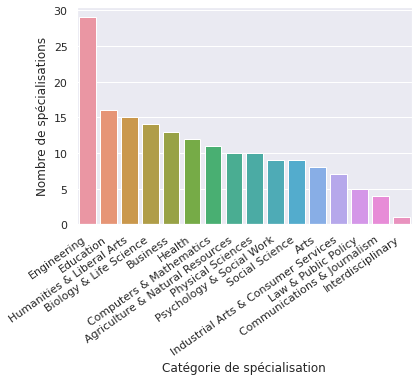

In [12]:
ax = sns.barplot(
    data=df[[F_MAJOR_CATEGORY]]
    .value_counts()
    .reset_index()
    .rename(columns={0: "Nombre de spécialisations"}),
    y="Nombre de spécialisations",
    x=F_MAJOR_CATEGORY,
)
var = ax.set_xticklabels(ax.get_xticklabels(), rotation=35, horizontalalignment="right")

In [13]:
df[F_MAJOR_CATEGORY].value_counts().describe()

count                16.0
mean              10.8125
std     6.316314853879066
min                   1.0
25%                  7.75
50%                  10.0
75%                 13.25
max                  29.0
Name: Catégorie de spécialisation, dtype: float64

> La catégorie *Engineering* contient le plus de spécialisations (>29), les autres se situent en moyenne autour d'une dizaine.

### Population totale par catégorie

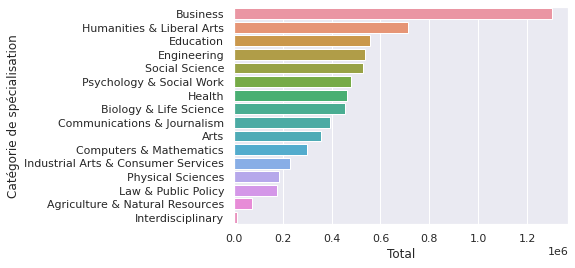

In [14]:
major_category_sorted_by_population_size = df.groupby([F_MAJOR_CATEGORY], as_index=False)[F_TOTAL].sum().sort_values(F_TOTAL, ascending=False)
ax = sns.barplot(
    data=df.groupby([F_MAJOR_CATEGORY], as_index=False)[F_TOTAL].sum().sort_values(F_TOTAL, ascending=False),
    y=F_MAJOR_CATEGORY,
    x=F_TOTAL
)

In [15]:
major_category_sorted_by_population_size

Catégorie de spécialisation       Total
3                              Business 1,302,376.0
9             Humanities & Liberal Arts   713,468.0
6                             Education   559,129.0
7                           Engineering   537,583.0
15                       Social Science   529,966.0
14             Psychology & Social Work   481,007.0
8                                Health   463,230.0
2                Biology & Life Science   453,862.0
4           Communications & Journalism   392,601.0
1                                  Arts   357,130.0
5               Computers & Mathematics   299,008.0
10  Industrial Arts & Consumer Services   229,792.0
13                    Physical Sciences   185,479.0
12                  Law & Public Policy   179,107.0
0       Agriculture & Natural Resources    75,620.0
11                    Interdisciplinary    12,296.0

In [16]:
(1302376-713468)/713468

0.8254161363929426

> La catégorie *Business* est la plus populée, suivi de *Humanities & Liberal Arts*, mais reste presque deux fois supérieur (~82,5%)

### Catégorie de spécialisation triées par valeurs médianes des revenus médians décroissantes

In [17]:
major_category_by_median_earning = (
    data=df.groupby([F_MAJOR_CATEGORY], as_index=False)[F_TOTAL]
    .sum()
)

SyntaxError: invalid syntax (<ipython-input-17-50b7c147de23>, line 2)

In [ ]:
major_category_by_median_earning

Catégorie de spécialisation
Engineering                           57,000.0
Computers & Mathematics               45,000.0
Business                              40,000.0
Physical Sciences                     39,500.0
Social Science                        38,000.0
Biology & Life Science                36,300.0
Law & Public Policy                   36,000.0
Agriculture & Natural Resources       35,000.0
Communications & Journalism           35,000.0
Health                                35,000.0
Industrial Arts & Consumer Services   35,000.0
Interdisciplinary                     35,000.0
Education                             32,750.0
Humanities & Liberal Arts             32,000.0
Arts                                  30,750.0
Psychology & Social Work              30,000.0
Name: Revenu médian, dtype: float64

In [ ]:
(57 - 45) / 45

0.26666666666666666

In [ ]:
major_category_by_median_earning.describe()

count                 16.0
mean             37,018.75
std     6,495.431086540754
min               30,000.0
25%               34,437.5
50%               35,000.0
75%               38,375.0
max               57,000.0
Name: Revenu médian, dtype: float64

> En médiane, la catégorie *Engineering* a le revenu médian le plus élevé (~26% supérieur au 2ème, *Computers & Mathematics*).

## Thèmes
- Population des diplômés
- Emploi
- Revenus médians
- Débouchées

### Population des diplômés

#### Population totale : répartition hommes/femmes

In [ ]:
df[F_MEN].sum() / (df[F_MEN].sum() + df[F_WOMEN].sum())

0.42477450856171917

> La population est constitué à 57,5% de femmes, et 42,5% d'hommes.

In [ ]:
pd.concat(
    [
        df[[F_MEN, F_WOMEN]].describe().round(2),
        df[[F_MEN, F_WOMEN]].agg({F_MEN: ["sum"], F_WOMEN: ["sum"]}),
    ],
    axis=0,
)

Hommes      Femmes
count       172.0       172.0
mean    16,723.41   22,646.67
std     28,122.43   41,057.33
min         119.0         0.0
25%       2,177.5    1,778.25
50%       5,434.0     8,386.5
75%      14,631.0   22,553.75
max     173,809.0   307,087.0
sum   2,876,426.0 3,895,228.0

In [ ]:
(8386 - 5434) / 5434

0.5432462274567538

> La médiane du nombre de femmes est supérieure à celle du nombre d'hommes (~54%).

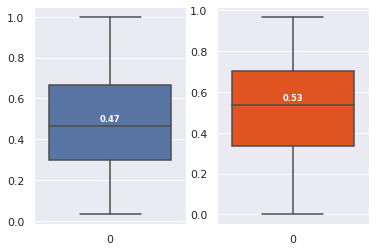

In [ ]:
fig, ax = plt.subplots(1, 2)
men_ratio_dist = df[F_MEN] / df[F_TOTAL]
women_ratio_dist = df[F_WOMEN] / df[F_TOTAL]
box_1 = sns.boxplot(
    ax=ax[0],
    data=men_ratio_dist,
    # kde=True
)
box_2 = sns.boxplot(
    ax=ax[1],
    data=women_ratio_dist,
    # kde=True,
    color="orangered",
)
for box_plot, median in zip(
    [box_1, box_2],
    [men_ratio_dist.median(), women_ratio_dist.median()],
):
    for xtick in box_plot.get_xticks():
        box_plot.text(
            xtick,
            median + median * 0.05,
            round(median, 2),
            horizontalalignment="center",
            size="x-small",
            color="w",
            weight="semibold",
        )


> En médiane, une spécialisation a une part de femmes plus élevée.

#### Catégories avec une proportion d'hommes dominante (deux fois plus)

In [ ]:
df.loc[df[F_SHAREWOMEN] < 1/3, F_MAJOR_CATEGORY].value_counts()

Engineering                            23
Computers & Mathematics                 7
Agriculture & Natural Resources         4
Industrial Arts & Consumer Services     4
Physical Sciences                       2
Business                                2
Law & Public Policy                     1
Name: Catégorie de spécialisation, dtype: Int64

#### Catégories avec une proportion de femmes (deux fois plus)

In [ ]:
df.loc[df[F_SHAREWOMEN] > 2/3, F_MAJOR_CATEGORY].value_counts()

Education                              11
Health                                 10
Humanities & Liberal Arts               9
Psychology & Social Work                8
Arts                                    4
Communications & Journalism             3
Physical Sciences                       2
Agriculture & Natural Resources         2
Social Science                          2
Law & Public Policy                     1
Business                                1
Biology & Life Science                  1
Interdisciplinary                       1
Industrial Arts & Consumer Services     1
Name: Catégorie de spécialisation, dtype: Int64

#### Ratio hommes/femmes

##### Répartition hommes/femmes parmi les catégories triés par population décroissante

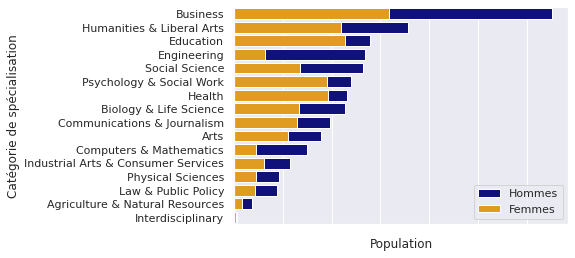

In [ ]:
tmp_df = df.groupby([F_MAJOR_CATEGORY], as_index=False)[[F_TOTAL, F_MEN, F_WOMEN]].sum().sort_values(F_TOTAL, ascending=False)
    data=df.groupby([F_MAJOR_CATEGORY], as_index=False)[F_TOTAL]
    .sum()
    data=tmp_df,
    y=F_MAJOR_CATEGORY,
    x=F_TOTAL,
    orient="h",
    color="darkblue",
    label="Hommes"
)
sns.barplot(
    data=tmp_df,
    y=F_MAJOR_CATEGORY,
    x=F_WOMEN,
    orient="h",
    color="orange",
    label="Femmes"
)
var = ax.set_xticklabels(ax.get_xticklabels(), rotation=40, horizontalalignment="right")
var = ax.set_xlabel("Population")
var = ax.legend()

##### Distribution de la part des femmes par catégorie triés par population décroissante

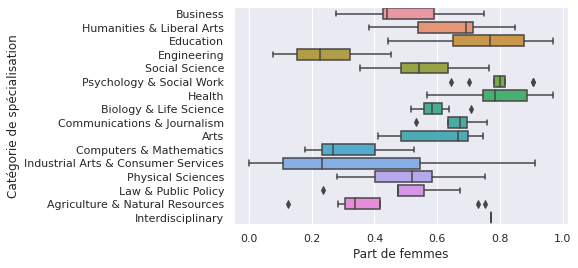

In [ ]:
ax = sns.boxplot(
    data=df.rename(columns={F_SHAREWOMEN: SHAREWOMEN}).melt(
        id_vars=F_MAJOR_CATEGORY, value_vars=SHAREWOMEN, value_name=F_SHAREWOMEN
    ),
    y=F_MAJOR_CATEGORY,
    x=F_SHAREWOMEN,
    order=major_category_sorted_by_population_size[F_MAJOR_CATEGORY].to_list(),
)
# var = ax.set_xticklabels(ax.get_xticklabels(), rotation=35, horizontalalignment="right")

##### (NE PAS UTILISER) Distribution des différences relatives entre le nombre d'hommes et de femmes

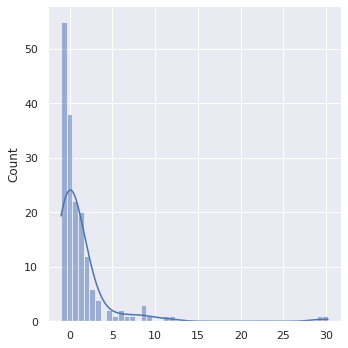

In [ ]:
sns.displot(
    data=((df[F_WOMEN] - df[F_MEN]) / df[F_MEN]).replace([np.inf, -np.inf], np.nan),
    kde=True,
)

##### (NE PAS UTILISER) Différence relative entre le nombre d'hommes et de femmes par catégorie triés par revenu médian décroissant

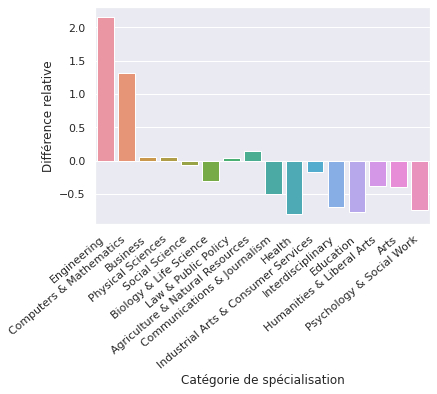

In [ ]:
tmp_df = df.groupby(F_MAJOR_CATEGORY)[[F_MEN, F_WOMEN]].sum().reset_index()
tmp_df["Différence relative"] = (tmp_df[F_MEN] - tmp_df[F_WOMEN]) / tmp_df[F_WOMEN]
tmp_df
ax = sns.barplot(
    data=tmp_df,
    x=F_MAJOR_CATEGORY,
    y="Différence relative",
    order=major_category_by_median_earning.index.tolist(),
)
var = ax.set_xticklabels(ax.get_xticklabels(), rotation=40, horizontalalignment="right")

Dans la catégorie ingénierie, la différence relative entre le nombre d'hommes et de femmes est supérieure à deux. Autrement dit, on compte une femme pour trois hommes.

### Emploi

### Revenus médians

#### Diagrammes en boîtes des revenus médians par catégorie de spécialisation triés par valeur médiane décroissante

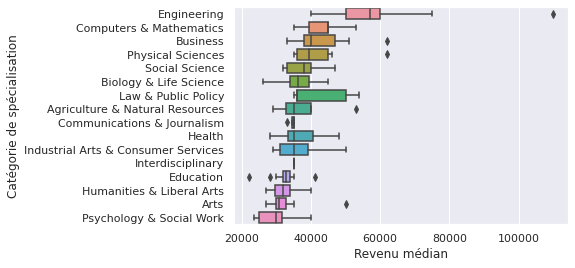

In [ ]:
ax = sns.boxplot(
    data=df.rename(columns={F_MEDIAN: MEDIAN}).melt(
        id_vars=F_MAJOR_CATEGORY,
        value_vars=MEDIAN,
        value_name=F_MEDIAN,
    ),
    y=F_MAJOR_CATEGORY,
    x=F_MEDIAN,
    order=major_category_by_median_earning.index.to_list(),
)
# var = ax.set_xticklabels(ax.get_xticklabels(), rotation=35, horizontalalignment="right")

#### Relation entre la part de femmes et le revenu médian

##### Diagrammes en boîtes de la part des femmes triés par valeur médiane des revenus médians décroissante

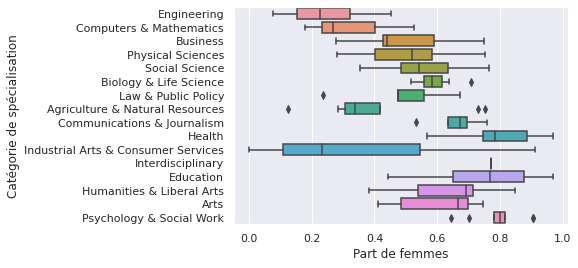

In [ ]:
ax = sns.boxplot(
    data=df.rename(columns={F_SHAREWOMEN: SHAREWOMEN}).melt(
        id_vars=F_MAJOR_CATEGORY, value_vars=SHAREWOMEN, value_name=F_SHAREWOMEN
    ),
    y=F_MAJOR_CATEGORY,
    x=F_SHAREWOMEN,
    order=major_category_by_median_earning.index.to_list(),
)
# var = ax.set_xticklabels(ax.get_xticklabels(), rotation=35, horizontalalignment="right")

In [ ]:
df.loc[df[F_MAJOR_CATEGORY] == "Engineering", F_SHAREWOMEN].describe()

count                  29.0
mean    0.23888867596551722
std     0.10177144889464185
min             0.077453027
25%             0.153037383
50%             0.227117943
75%             0.322222222
max             0.451464886
Name: Part de femmes, dtype: float64

In [ ]:
df.loc[df[F_MAJOR_CATEGORY] == "Education", F_SHAREWOMEN].describe()

count                  16.0
mean          0.74850749475
std     0.15461387160788934
min             0.444582285
25%            0.6488059705
50%      0.7693683689999999
75%           0.87741062775
max             0.968953683
Name: Part de femmes, dtype: float64

> En représentant la distribution de la part de femmes parmi les catégories triées par valeur médiane des revenus médians décroissante, on observe une différence prononcée de la part de femmes entre les catégories qui gagnent en médiane le plus, et celle qui gagnent le moins. L'ingénierie a une faible part de femmes, entre 7% et 45%, tandis que l'éducation a une part de femme comprise entre 44% et 96%.

##### Part de femmes expliquée par le revenu annuel médian

                            OLS Regression Results                            
Dep. Variable:         Part de femmes   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     105.4
Date:                Sun, 23 May 2021   Prob (F-statistic):           1.51e-19
Time:                        15:19:32   Log-Likelihood:                 49.827
No. Observations:                 172   AIC:                            -95.65
Df Residuals:                     170   BIC:                            -89.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.0224      0.051     20.184

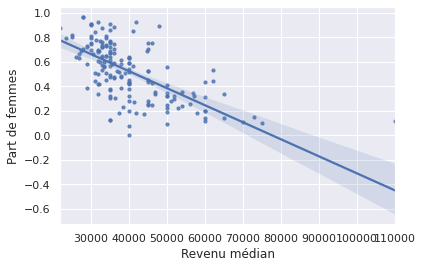

In [ ]:
lin_reg_model = sm.OLS(
    df[[F_SHAREWOMEN]], sm.add_constant(df[[F_MEDIAN]]), missing="drop"
)
lin_reg_res = lin_reg_model.fit()
print(lin_reg_res.summary())

# Seaborn
g = sns.regplot(
    data=df,
    x=F_MEDIAN,
    y=F_SHAREWOMEN,
    robust=True,
    scatter_kws={"s":10}
)

In [ ]:
stats.normaltest(df[F_MEDIAN])

NormaltestResult(statistic=94.18713030991938, pvalue=3.527967047825003e-21)

In [ ]:
stats.normaltest(df[F_SHAREWOMEN], nan_policy="omit")

NormaltestResult(statistic=21.198515537750172, pvalue=2.493451003433553e-05)

In [ ]:
df.sort_values(F_MEDIAN, ascending=False).head(1)

Rang  Code de la spécialisation         Spécialisation   Total  Hommes  \
0     1                       2419  PETROLEUM ENGINEERING 2,339.0 2,057.0   

   Femmes Catégorie de spécialisation  Part de femmes  \
0   282.0                 Engineering     0.120564344   

   Taille de l'échantillon  Salarié  ...  Salarié à temps partiel  \
0                       36     1976  ...                      270   

   Salarié à plein temps toute l'année  Chômeur  Taux de chômage  \
0                                 1207       37      0.018380527   

   Revenu médian  25ème centile du revenu  75ème centile du revenu  \
0      110,000.0                 95,000.0                125,000.0   

   Diplôme universitaire requis  Diplôme universitaire non requis  \
0                          1534                               364   

   Emploi peu rémunéré  
0                  193  

[1 rows x 21 columns]

> La distribution des revenus médians n'est pas normale, et il y a de fortes valeurs extrêmes (*Petroleum Engineering*). Pour qualifier la relation qui lie la part de femmes au revenu médian, on calcule la corrélation de Spearman. Ce coefficient a l'avantage d'être moins sensible aux valeurs extrêmes.

In [ ]:
stats.spearmanr(df[[F_MEDIAN, F_SHAREWOMEN]], nan_policy="omit")

SpearmanrResult(correlation=-0.6557227364730451, pvalue=1.6490233496029415e-22)

> En établissant un modèle de régression linéaire ordinaire entre le revenu médian, et la part de femme de la spécialisation, une relation linéaire négative est observée. Plus le revenu médian est élevé, plus la part de femmes est haute. Cette relation est confirmée par une corrélation négative forte, qui traduit une relation de nature inversement proportionnelle entre la part de femmes et le revenu médian.

##### (Ne pas utiliser cette analyse) Part de femmes expliquée par le rang d'une spécialisation (plus le rang est bas, plus le revenu annuel médian est élevé)

                            OLS Regression Results                            
Dep. Variable:         Part de femmes   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     120.3
Date:                Sun, 23 May 2021   Prob (F-statistic):           1.65e-21
Time:                        15:11:00   Log-Likelihood:                 54.358
No. Observations:                 172   AIC:                            -104.7
Df Residuals:                     170   BIC:                            -98.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2620      0.027      9.595      0.0

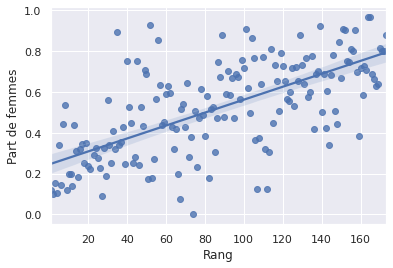

In [ ]:
lin_reg_model = sm.OLS(
    df[[F_SHAREWOMEN]], sm.add_constant(df[[F_RANK]]), missing="drop"
)
lin_reg_res = lin_reg_model.fit()
print(lin_reg_res.summary())

# Seaborn
g = sns.regplot(
    data=df,
    x=F_RANK,
    y=F_SHAREWOMEN,
    robust=True,
)

In [ ]:
stats.normaltest(df[F_RANK], nan_policy="omit")

NormaltestResult(statistic=76.13150090069117, pvalue=2.9393725216259145e-17)

In [ ]:
stats.normaltest(df[F_SHAREWOMEN], nan_policy="omit")

NormaltestResult(statistic=21.198515537750172, pvalue=2.493451003433553e-05)

In [ ]:
stats.spearmanr(df[[F_RANK, F_SHAREWOMEN]], nan_policy="omit")

SpearmanrResult(correlation=0.6466087924475795, pvalue=9.636363382169942e-22)

> En établissant un modèle de régression linéaire ordinaire entre le rang, et la part de femme de la spécialisation, une relation linéaire positive est observée. Plus le rang est élevé, plus la part de femmes est haute. Travailler avec les rangs directement mène forcément à une perte d'information. On applique le même raisonnement pour expliquer la part de femmes par le revenu médian.

> On observe également une corrélation positive forte entre les deux variables.

#### Relation entre l'écart inter-quartile et le revenu annuel médian

##### Diagrammes en boîtes des écarts interquartiles triés par revenu annuel médian

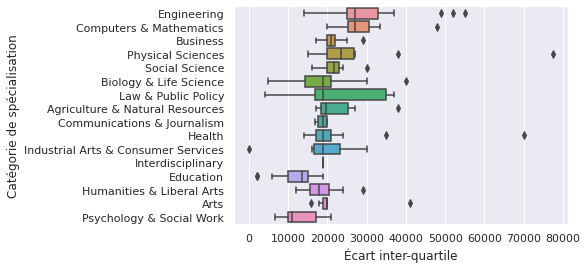

In [ ]:
ax = sns.boxplot(
    data=pd.DataFrame((df[F_P75TH] - df[F_P25TH]), columns=["Écart inter-quartile"])
    .set_index(df[F_MAJOR_CATEGORY])
    .reset_index(),
    y=F_MAJOR_CATEGORY,
    x="Écart inter-quartile",
    order=major_category_by_median_earning.index.tolist(),
    # showfliers=False
)
# var = ax.set_xticklabels(ax.get_xticklabels(), rotation=40, horizontalalignment="right")

##### L'écart interquartile expliquée par le revenu annuel médian

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     61.13
Date:                Sun, 23 May 2021   Prob (F-statistic):           5.23e-13
Time:                        15:20:28   Log-Likelihood:                -1816.6
No. Observations:                 173   AIC:                             3637.
Df Residuals:                     171   BIC:                             3643.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3541.1175   2453.793      1.443

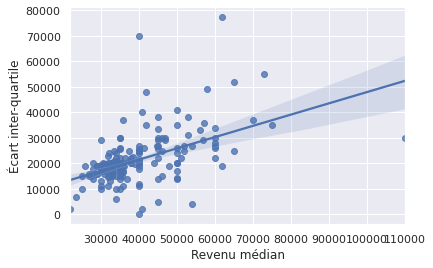

In [ ]:
lin_reg_model = sm.OLS(
    pd.DataFrame((df[F_P75TH] - df[F_P25TH])), sm.add_constant(df[[F_MEDIAN]]), missing="drop"
)
lin_reg_res = lin_reg_model.fit()
print(lin_reg_res.summary())

# Seaborn
g = sns.regplot(
    data=pd.DataFrame((df[F_P75TH] - df[F_P25TH]), columns=["Écart inter-quartile"])
    .set_index(df[F_MEDIAN])
    .reset_index(),
    x=F_MEDIAN,
    y="Écart inter-quartile",
    robust=True,
    truncate=True,
)

In [ ]:
stats.normaltest(df[F_MEDIAN], nan_policy="omit")

NormaltestResult(statistic=94.18713030991938, pvalue=3.527967047825003e-21)

In [ ]:
stats.normaltest(df[F_P75TH] - df[F_P25TH], nan_policy="omit")

NormaltestResult(statistic=91.13632710352412, pvalue=1.6218026996351774e-20)

In [ ]:
stats.spearmanr(pd.concat([df[F_P75TH] - df[F_P25TH], df[F_MEDIAN]], axis=1), nan_policy="omit")

SpearmanrResult(correlation=0.5825644378899052, pvalue=4.173522347362102e-17)

> En établissant un modèle de régression linéaire ordinaire entre l'écart inter-quartile, et le revenu médian de la spécialisation, une relation linéaire positive est observée. Plus le revenu médian est élevé, plus l'écart inter-quartile est grand.

> On observe également une corrélation positive forte entre les deux variables.

### Débouchées

#### Diagrammes en boîtes du taux de chômage trié par revenu annuel médian

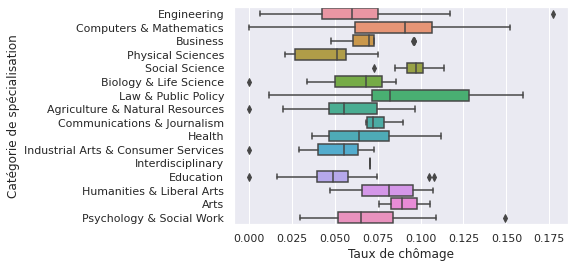

In [ ]:
ax = sns.boxplot(
    data=df.rename(columns={F_UNEMPLOYMENT_RATE: UNEMPLOYMENT_RATE}).melt(
        id_vars=F_MAJOR_CATEGORY,
        value_vars=UNEMPLOYMENT_RATE,
        value_name=F_UNEMPLOYMENT_RATE,
    ),
    y=F_MAJOR_CATEGORY,
    x=F_UNEMPLOYMENT_RATE,
    order=major_category_by_median_earning.index.tolist(),
)
# var = ax.set_xticklabels(ax.get_xticklabels(), rotation=40, horizontalalignment="right")

## Median earnings

In [ ]:
df[[SAMPLE_SIZE, MEDIAN, P25TH, P75TH]].describe()

KeyError: "None of [Index(['Sample_size', 'Median', 'P25th', 'P75th'], dtype='object')] are in the [columns]"

In [ ]:
sns.histplot(df[MEDIAN], kde=True)

In [ ]:
g = sns.FacetGrid(
    data=df.melt(id_vars=[RANK, MAJOR_CATEGORY], value_vars=[MEDIAN, P25TH, P75TH]),
    col="variable",
    row=MAJOR_CATEGORY,
    margin_titles=True,
)
g.map_dataframe(sns.histplot, x="value", kde=True)

## Dataset anomalies

### [Reconstructed Original source code](https://github.com/fivethirtyeight/data/blob/master/college-majors/college-majors-rscript.R)
```R
# COLLEGE MAJORS AND EARNINGS
# This is the code used to generate data for FiveThirtyEight's
# story on earnings by college major.
# Analysis is based off the 2010-2012 American Community Survey
# microdata. 
# Download data here: http://www.census.gov/acs/www/data_documentation/pums_data/
# Documentation here: http://www.census.gov/acs/www/data_documentation/pums_documentation/
--------------------------------------------------------------------------
# First download data and select records for which college major 
# (variable FOD1P) is present. Save into data frame as MAJORS1012.
# Also download github_majorslist.csv
require(dplyr)

load("MAJORS1012")
MajorsList <- read.csv("github_majorslist.csv",header=TRUE,stringsAsFactors=FALSE)

working <- merge(MAJORS1012,MajorsList,by="FOD1P") # Check merge properly
MAJORS1012  <- working
rm(working)

# Create dummy for full-time, year-round workers
MAJORS1012$FTYR <- 0
MAJORS1012$FTYR[MAJORS1012$WKW == 1 & MAJORS1012$WKHP >= 35] <- 1
nrow(MAJORS1012[MAJORS1012$FTYR==1,])


# For YOUNG (up to 27):
#   - Number: Total, Employed, Unemployed, Employed FTYR
#   - Sample size
#   - Median earnings (for FYFT)
#   - 25% and 75% percentile earnings
#   - Unemployment rate
#   - Median hours worked
#   - Share working full-time
#   - Share employed in college/noncollege and low-end jobs
# Several smaller data frames
young <- filter(MAJORS1012,AGEP < 28) # This DOES include students with grad degrees
young.ftyr <- filter(young,FTYR == 1 & SCHL == 21 & SCH == 1) # But this doesn't. Also excludes those in school.

lowend <- c(4020,4030,4040,4050,4060,4110,4120,4130,4140,4150,4220,4230,4240,4250,4720,4740,4750,4760,4940)
young$LowEnd  <-  0
young$LowEnd[young$OCCP10 %in% as.list(lowend) | young$OCCP12 %in% as.list(lowend)] <- 1

# This creates a dummy for college-level jobs. Based off non-public data from Jaison R. Abel and
# Richard Deitz of the New York Fed. As a result, csv is not included here.
collegejobs <- read.csv("collegejobs.csv",header=TRUE,stringsAsFactors=FALSE)
young$collegejob[young$OCCP10 %in% as.list(collegejobs$OCC[collegejobs$College==1]) | 
                   young$OCCP12 %in% as.list(collegejobs$OCC[collegejobs$College==1])]  <- 1
young$noncollege[young$OCCP10 %in% as.list(collegejobs$OCC[collegejobs$College==0]) | 
                   young$OCCP12 %in% as.list(collegejobs$OCC[collegejobs$College==0])]  <- 1

Young <- data.frame(FOD1P = as.numeric(MajorsList$FOD1P[2:nrow(MajorsList)]),Major = MajorsList$Major[2:nrow(MajorsList)],Major_Cat = MajorsList$Major_Category[2:nrow(MajorsList)],
                    Total = NA, Employed = NA, FTYR = NA, Unemployed = NA, Urate = NA, Median = NA, P25th = NA, P75th = NA, Sample = NA,
                    Median_hours = NA, FT = NA, PT = NA, LowEnd = NA, CollegeJob = NA, NonCollege = NA, Men = NA, Women = NA, ShareWomen = NA)

loop <- seq(1:nrow(AllAges))
for (i in loop) {
    x <- Young$FOD1P[i]
    Young[i,4] <- with(young,sum(PWGTP[FOD1P==x]))
    Young[i,5] <- with(young,sum(PWGTP[FOD1P==x & (ESR == 1 | ESR == 2)]))
    Young[i,6] <- with(young,sum(PWGTP[FOD1P==x & FTYR == 1]))
    Young[i,7] <- with(young,sum(PWGTP[FOD1P==x & ESR == 3]))
    Young[i,8] <- Young[i,7]/(Young[i,5] + Young[i,7])
    Young[i,9] <- with(young.ftyr[young.ftyr$FOD1P == x & young.ftyr$PERNP>0,],median(rep(PERNP,times=PWGTP)))
    Young[i,10] <- with(young.ftyr[young.ftyr$FOD1P == x & young.ftyr$PERNP>0,],quantile(rep(PERNP,times=PWGTP))[2])
    Young[i,11] <- with(young.ftyr[young.ftyr$FOD1P == x & young.ftyr$PERNP>0,],quantile(rep(PERNP,times=PWGTP))[4])
    Young[i,12] <- nrow(young.ftyr[young.ftyr$FOD1P == x & young.ftyr$PERNP>0,])
    Young[i,13] <- with(young[young$FOD1P == x,],median(na.omit(rep(WKHP,times=PWGTP))))
    Young[i,14] <- with(young,sum(na.omit(PWGTP[FOD1P==x & WKHP >= 35])))
    Young[i,15] <- with(young,sum(na.omit(PWGTP[FOD1P==x & WKHP < 35])))
    Young[i,16] <- with(young,sum(PWGTP[FOD1P==x & LowEnd == 1]))
    Young[i,17] <- with(young,sum(na.omit(PWGTP[FOD1P==x & collegejob == 1 & (ESR == 1 | ESR == 2)]))) # only want employed
    Young[i,18] <- with(young,sum(na.omit(PWGTP[FOD1P==x & noncollege == 1 & (ESR == 1 | ESR == 2)]))) # only want employed
    Young[i,19] <- with(young,sum(PWGTP[FOD1P==x & SEX == 1]))
    Young[i,20] <- with(young,sum(PWGTP[FOD1P==x & SEX == 2]))
    Young[i,21] <- Young[i,20]/(Young[i,19] + Young[i,20])
}

write.csv(Young,file="Young.csv")
```
### Employed, Unemployed

In [ ]:
f"{df.Total.sum():,}"

'6,771,654.0'

In [ ]:
f"{df[F_EMPLOYED].sum() + df[F_UNEMPLOYED].sum():,}"

'5,814,373'

```R
Young[i,5] <- with(young,sum(PWGTP[FOD1P==x & (ESR == 1 | ESR == 2)]))
Young[i,7] <- with(young,sum(PWGTP[FOD1P==x & ESR == 3]))
```
Un filtre sur *ESR* s'applique, les catégories manquantes correspondent à la différence.

### Full-time, Part-time

In [ ]:
f"{df[F_EMPLOYED].sum():,}"

'5,396,348'

In [ ]:
f"{df[F_FULL_TIME].sum() + df[F_PART_TIME].sum():,}"

'6,031,075'

```R
Young[i,14] <- with(young,sum(na.omit(PWGTP[FOD1P==x & WKHP >= 35])))
Young[i,15] <- with(young,sum(na.omit(PWGTP[FOD1P==x & WKHP < 35])))
```
Le filtre *ESR == 1* ou *ESR == 2* ne s'applique pas.

### Non-college jobs, college jobs

In [ ]:
f"{df[F_EMPLOYED].sum():,}"

'5,396,348'

In [ ]:
f"{df[F_COLLEGE_JOBS].sum() + df[F_NON_COLLEGE_JOBS].sum():,}"

'4,430,034'

<AxesSubplot:>

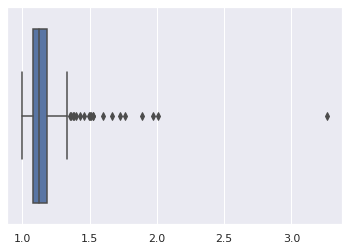

In [25]:
sns.boxplot(df[F_EMPLOYED] / (df[F_COLLEGE_JOBS] + df[F_NON_COLLEGE_JOBS]))

```R
young$collegejob[young$OCCP10 %in% as.list(collegejobs$OCC[collegejobs$College==1]) | 
                   young$OCCP12 %in% as.list(collegejobs$OCC[collegejobs$College==1])]  <- 1
young$noncollege[young$OCCP10 %in% as.list(collegejobs$OCC[collegejobs$College==0]) | 
                   young$OCCP12 %in% as.list(collegejobs$OCC[collegejobs$College==0])]  <- 1
Young[i,17] <- with(young,sum(na.omit(PWGTP[FOD1P==x & collegejob == 1 & (ESR == 1 | ESR == 2)]))) # only want employed
Young[i,18] <- with(young,sum(na.omit(PWGTP[FOD1P==x & noncollege == 1 & (ESR == 1 | ESR == 2)]))) # only want employed
```

Parmi les individus avec un emploi, le filtre sur l'exigence d'un diplôme universitare ne s'applique uniquement parmi une liste choisie de métiers. Comme le nombre d'individus employés comprend tous les métiers possibles, et est supérieur à la somme des individus diplôme universitaire exigé ou non, on en déduit que la liste utilisée des métiers n'est pas complète. Dans le cas contraire, comme précisé dans le code source, supposant que *\$NON_COLLEGE_JOBS* étant le complémentaire de *\$COLLEGE_JOBS*, les deux quantités auraient été égales. Plus improbable, la variable *\$College* dans la liste des métiers est peut-être codée dans un espace non binaire, par exemple diplômé université exigé, non exigé, ou indifférent.

### Low-wage jobs

In [ ]:
f"{df[F_EMPLOYED].sum():,}"

'5,396,348'

In [ ]:
f"{df[F_COLLEGE_JOBS].sum() + df[F_NON_COLLEGE_JOBS].sum() + df[F_LOW_WAGE_JOBS].sum():,}"

'5,097,644'

```R
Young[i,16] <- with(young,sum(PWGTP[FOD1P==x & LowEnd == 1]))
```

Il n'est pas possible de savoir si la liste des métiers peu rémunérés est disjointe des métiers qui exigent/n'exigent pas un diplôme universitaire. Par ailleurs, la somme des individus diplôme université exigé ou non et à emploi peu rémunéré est inférieure à la somme des individus avec un emploi, ce qui laisse également à penser que l'ensemble des métiers n'est pas complet malgré l'addition des métiers peu rémunéré.

# References
- Corrélation : https://doi.org/10.1177/8756479308317006
- ACS : https://www.census.gov/programs-surveys/acs/about/acs-and-census.html
- PUMS : https://www.census.gov/programs-surveys/acs/microdata.html
- Article : https://fivethirtyeight.com/features/the-economic-guide-to-picking-a-college-major/#fn-4
- Original github : https://github.com/fivethirtyeight/data/tree/master/college-majors
